In [12]:
import numpy as np
from qiskit_aer import Aer
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit import transpile
from qiskit.visualization import plot_histogram

In [22]:
def phase_oracle(n, indices_to_mark, name='Oracle'):
    qc= QuantumCircuit(n, name= name)
    oracle_matrix= np.identity(2**n)  #we define our oracle , its suppose to flip sign of the marked(|w⟩ that is give it -1 
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark]= -1 #other elements will have +1 so no change in sign
    qc.unitary(Operator(oracle_matrix),range(n))
    #the Operator(oracle_matrix) converts the oracle_matrix (which is a numpy array) into a Qiskit Operator object.
    #This object can then be used as a quantum operation within your quantum circuit.
    #When you use qc.unitary(Operator(oracle_matrix), range(n)), 
    #you're adding this oracle operation to the quantum circuit qc over n qubits
    return qc
def diffuser(n):
    qc=QuantumCircuit(n , name='Differ-"V"')
    qc.h(range(n))
    qc.append(phase_oracle(n,[0]),range(n))#It then applies the phase oracle designed to mark the ∣0⟩^⊗n state
    qc.h(range(n))
    return qc
def Grover(n,marked):
    qc=QuantumCircuit(n, n)
    r= int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
    print(f'{n} qubits, basis state{marked} marked ,{r} rounds')
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n,marked), range(n))
        qc.append(diffuser(n), range(n))
    qc.measure(range(n),range(n))
    return qc

5 qubits, basis state[4] marked ,4 rounds


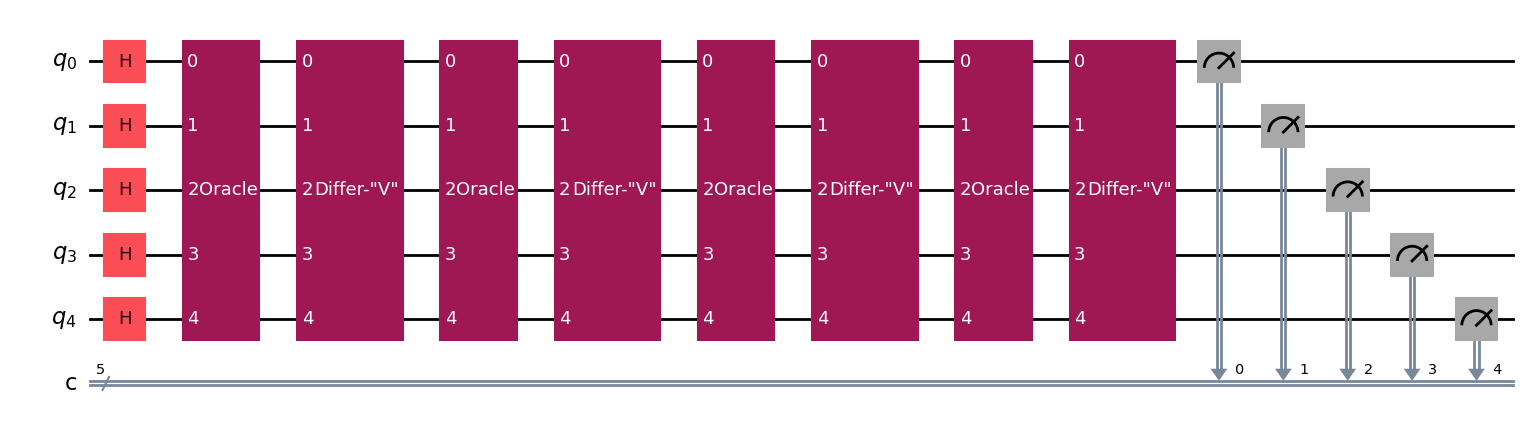

In [23]:
n= 5
x= np.random.randint(2**n)
marked =[x]
qc= Grover(n, marked)
qc.draw('mpl')

{'01110': 1, '10001': 1, '10100': 1, '01011': 1, '00100': 9996}
3.919534679768385


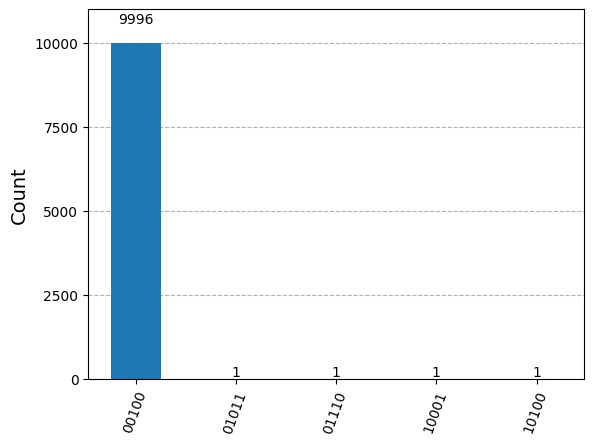

In [24]:
backend = Aer.get_backend("qasm_simulator")
tc = transpile(qc,backend)
result = backend.run(tc, shots=10000).result()
counts= result.get_counts(qc)
print(counts)
print (np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)
plot_histogram(counts)

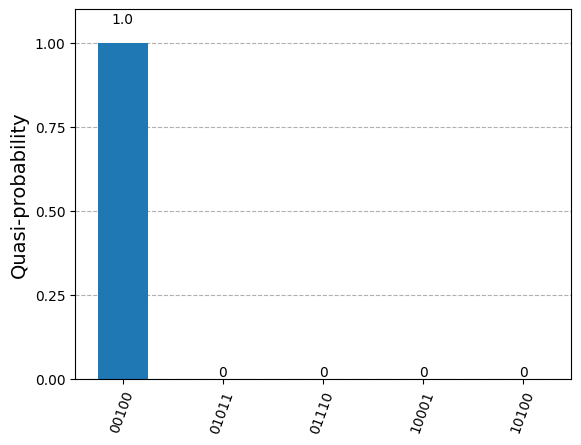

In [25]:
total_shots = sum(counts.values())
probabilities = {key: count / total_shots for key, count in counts.items()}

# Plot the histogram with probabilities
plot_histogram(probabilities)